In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = "{:.2f}".format

In [52]:
df = pd.read_csv("saipem.csv")
print("Dimensione dataset \n", df.shape, "\n")

Dimensione dataset 
 (373, 19) 



In [53]:
print("Parte iniziale del dataset \n",df.head(), "\n")

Parte iniziale del dataset 
          date project_id  expected_inflow  actual_inflow  expected_outflow  \
0  2022-02-28      PJT_A        895265.85           0.00        1499375.79   
1  2022-05-08      PJT_A        780899.69           0.00        1142643.92   
2  2022-08-25      PJT_A             0.00     1520979.64        1187295.22   
3  2023-03-23      PJT_A        868384.19           0.00         483095.78   
4  2023-04-03      PJT_A        882046.23           0.00         830207.11   

   actual_outflow  opening_cash  closing_cash  net_cash_flow  \
0      1473503.12    2514901.42    1041398.30    -1473503.12   
1       974548.10    1041398.30      66850.20     -974548.10   
2      1135386.11      66850.20     452443.73      385593.53   
3       307591.29     452443.73     144852.44     -307591.29   
4       132316.78     144852.44      12535.66     -132316.78   

   accounts_receivable  accounts_payable       cogs  current_liabilities  \
0            895265.85          25872.67 

In [54]:
df.describe()

,expected_inflow,actual_inflow,expected_outflow,actual_outflow,opening_cash,closing_cash,net_cash_flow,accounts_receivable,accounts_payable,cogs,current_liabilities,net_cash_flow_lag1,rolling_net_7,rolling_outflow_30,days_sales_uncollected,days_payables_outstanding,ocf_ratio
count,373.00,373.00,373.00,373.00,373.00,373.00,373.00,373.00,373.00,373.00,373.00,370.00,373.00,373.00,373.00,373.00,373.00
mean,267621.78,256579.80,293022.73,256287.20,932206.36,932498.97,292.60,2352240.84,4335557.11,293022.73,5408892.98,-1684.45,-12698.74,271729.54,11.09,11.90,-0.21
std,284777.43,424973.49,278553.56,289649.32,1105820.89,1108568.37,437108.48,2062089.06,3441114.80,278553.56,4300697.06,438098.12,187880.85,188764.61,12.47,7.56,2.42
min,0.00,0.00,0.00,0.00,0.01,0.01,-1612379.92,52783.43,0.00,0.00,0.00,-1612379.92,-1473503.12,0.00,3.91,0.00,-42.62
25%,0.00,0.00,84819.54,23424.90,66850.20,62035.07,-188687.27,648358.81,833177.09,84819.54,1062764.57,-190307.77,-81356.57,124270.42,6.16,4.59,-0.07
50%,186528.27,0.00,204207.71,167557.33,452443.73,438857.87,-1708.46,1422952.73,3693684.23,204207.71,4595234.76,-1944.16,-9348.60,197556.45,8.83,10.48,-0.00
75%,403407.33,398962.65,436070.77,383210.99,1579397.10,1579397.10,163614.21,4214323.79,8173988.36,436070.77,10171777.05,156626.15,67121.61,404283.57,11.58,19.61,0.04
max,999469.02,3325949.59,1499375.79,1612379.92,4990117.28,4990117.28,2488073.43,8236112.80,9910222.24,1499375.79,13054708.78,2488073.43,567935.49,1473503.12,90.00,23.14,2.96


In [55]:
print("Informazioni generali \n")
print(df.info())

Informazioni generali 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       373 non-null    object 
 1   project_id                 373 non-null    object 
 2   expected_inflow            373 non-null    float64
 3   actual_inflow              373 non-null    float64
 4   expected_outflow           373 non-null    float64
 5   actual_outflow             373 non-null    float64
 6   opening_cash               373 non-null    float64
 7   closing_cash               373 non-null    float64
 8   net_cash_flow              373 non-null    float64
 9   accounts_receivable        373 non-null    float64
 10  accounts_payable           373 non-null    float64
 11  cogs                       373 non-null    float64
 12  current_liabilities        373 non-null    float64
 13  net_cash_flow_lag1        

In [56]:
df_copy=df.copy()

In [57]:
# Seleziona le colonne con dtype float64
float64_cols = df_copy.select_dtypes(include=['float64']).columns

# Cambia il dtype delle colonne selezionate a float32
df_copy[float64_cols] = df_copy[float64_cols].astype('float32')

# Verifica i tipi di dato aggiornati
print(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       373 non-null    object 
 1   project_id                 373 non-null    object 
 2   expected_inflow            373 non-null    float32
 3   actual_inflow              373 non-null    float32
 4   expected_outflow           373 non-null    float32
 5   actual_outflow             373 non-null    float32
 6   opening_cash               373 non-null    float32
 7   closing_cash               373 non-null    float32
 8   net_cash_flow              373 non-null    float32
 9   accounts_receivable        373 non-null    float32
 10  accounts_payable           373 non-null    float32
 11  cogs                       373 non-null    float32
 12  current_liabilities        373 non-null    float32
 13  net_cash_flow_lag1         370 non-null    float32

In [58]:
df_copy['date'] = pd.to_datetime(df_copy['date'], errors='coerce')

In [59]:
df_copy['project_id'] = df_copy['project_id'].astype('category')

In [60]:
print("Parte iniziale del dataset \n",df_copy.head(), "\n")

Parte iniziale del dataset 
         date project_id  expected_inflow  actual_inflow  expected_outflow  \
0 2022-02-28      PJT_A        895265.88           0.00        1499375.75   
1 2022-05-08      PJT_A        780899.69           0.00        1142643.88   
2 2022-08-25      PJT_A             0.00     1520979.62        1187295.25   
3 2023-03-23      PJT_A        868384.19           0.00         483095.78   
4 2023-04-03      PJT_A        882046.25           0.00         830207.12   

   actual_outflow  opening_cash  closing_cash  net_cash_flow  \
0      1473503.12    2514901.50    1041398.31    -1473503.12   
1       974548.12    1041398.31      66850.20     -974548.12   
2      1135386.12      66850.20     452443.72      385593.53   
3       307591.28     452443.72     144852.44     -307591.28   
4       132316.78     144852.44      12535.66     -132316.78   

   accounts_receivable  accounts_payable       cogs  current_liabilities  \
0            895265.88          25872.67 149937

In [61]:
print("Colonne presenti nel dataset \n", df_copy.columns)
print("\n Tipo di ogni colonnea: \n", df_copy.dtypes)

Colonne presenti nel dataset 
 Index(['date', 'project_id', 'expected_inflow', 'actual_inflow',
       'expected_outflow', 'actual_outflow', 'opening_cash', 'closing_cash',
       'net_cash_flow', 'accounts_receivable', 'accounts_payable', 'cogs',
       'current_liabilities', 'net_cash_flow_lag1', 'rolling_net_7',
       'rolling_outflow_30', 'days_sales_uncollected',
       'days_payables_outstanding', 'ocf_ratio'],
      dtype='object')

 Tipo di ogni colonnea: 
 date                         datetime64[ns]
project_id                         category
expected_inflow                     float32
actual_inflow                       float32
expected_outflow                    float32
actual_outflow                      float32
opening_cash                        float32
closing_cash                        float32
net_cash_flow                       float32
accounts_receivable                 float32
accounts_payable                    float32
cogs                                float32
c

In [62]:
# Before optimization
original_memory = df.memory_usage(deep=True).sum()

# After optimizing columns (category, float32, datetime, etc.)
optimized_memory = df_copy.memory_usage(deep=True).sum()

# Print comparison
print(f"Original: {original_memory / 1024**2:.2f} MB")
print(f"Optimized: {optimized_memory / 1024**2:.2f} MB")
print(f"Reduction: {((original_memory - optimized_memory) / original_memory) * 100:.2f}%")

Original: 0.09 MB
Optimized: 0.03 MB
Reduction: 68.69%


In [63]:
# Conta il numero di date duplicate nella colonna 'date'
num_duplicates = df_copy['date'].duplicated().sum()

if num_duplicates > 0:
    print(f"Ci sono {num_duplicates} date duplicate nella colonna 'date'.")
    # Puoi anche visualizzare le righe duplicate se necessario
    # display(df_copy[df_copy.duplicated(subset=['date'], keep=False)])
else:
    print("Non ci sono date duplicate nella colonna 'date'.")

Ci sono 39 date duplicate nella colonna 'date'.


In [64]:
# Rimuovi i duplicati basandoti sulla colonna 'date'
df_no_duplicates = df_copy.drop_duplicates(subset=['date'], keep='first')

# Verifica la nuova dimensione del dataframe
print("Dimensione dataframe dopo la rimozione dei duplicati:", df_no_duplicates.shape)

Dimensione dataframe dopo la rimozione dei duplicati: (334, 19)


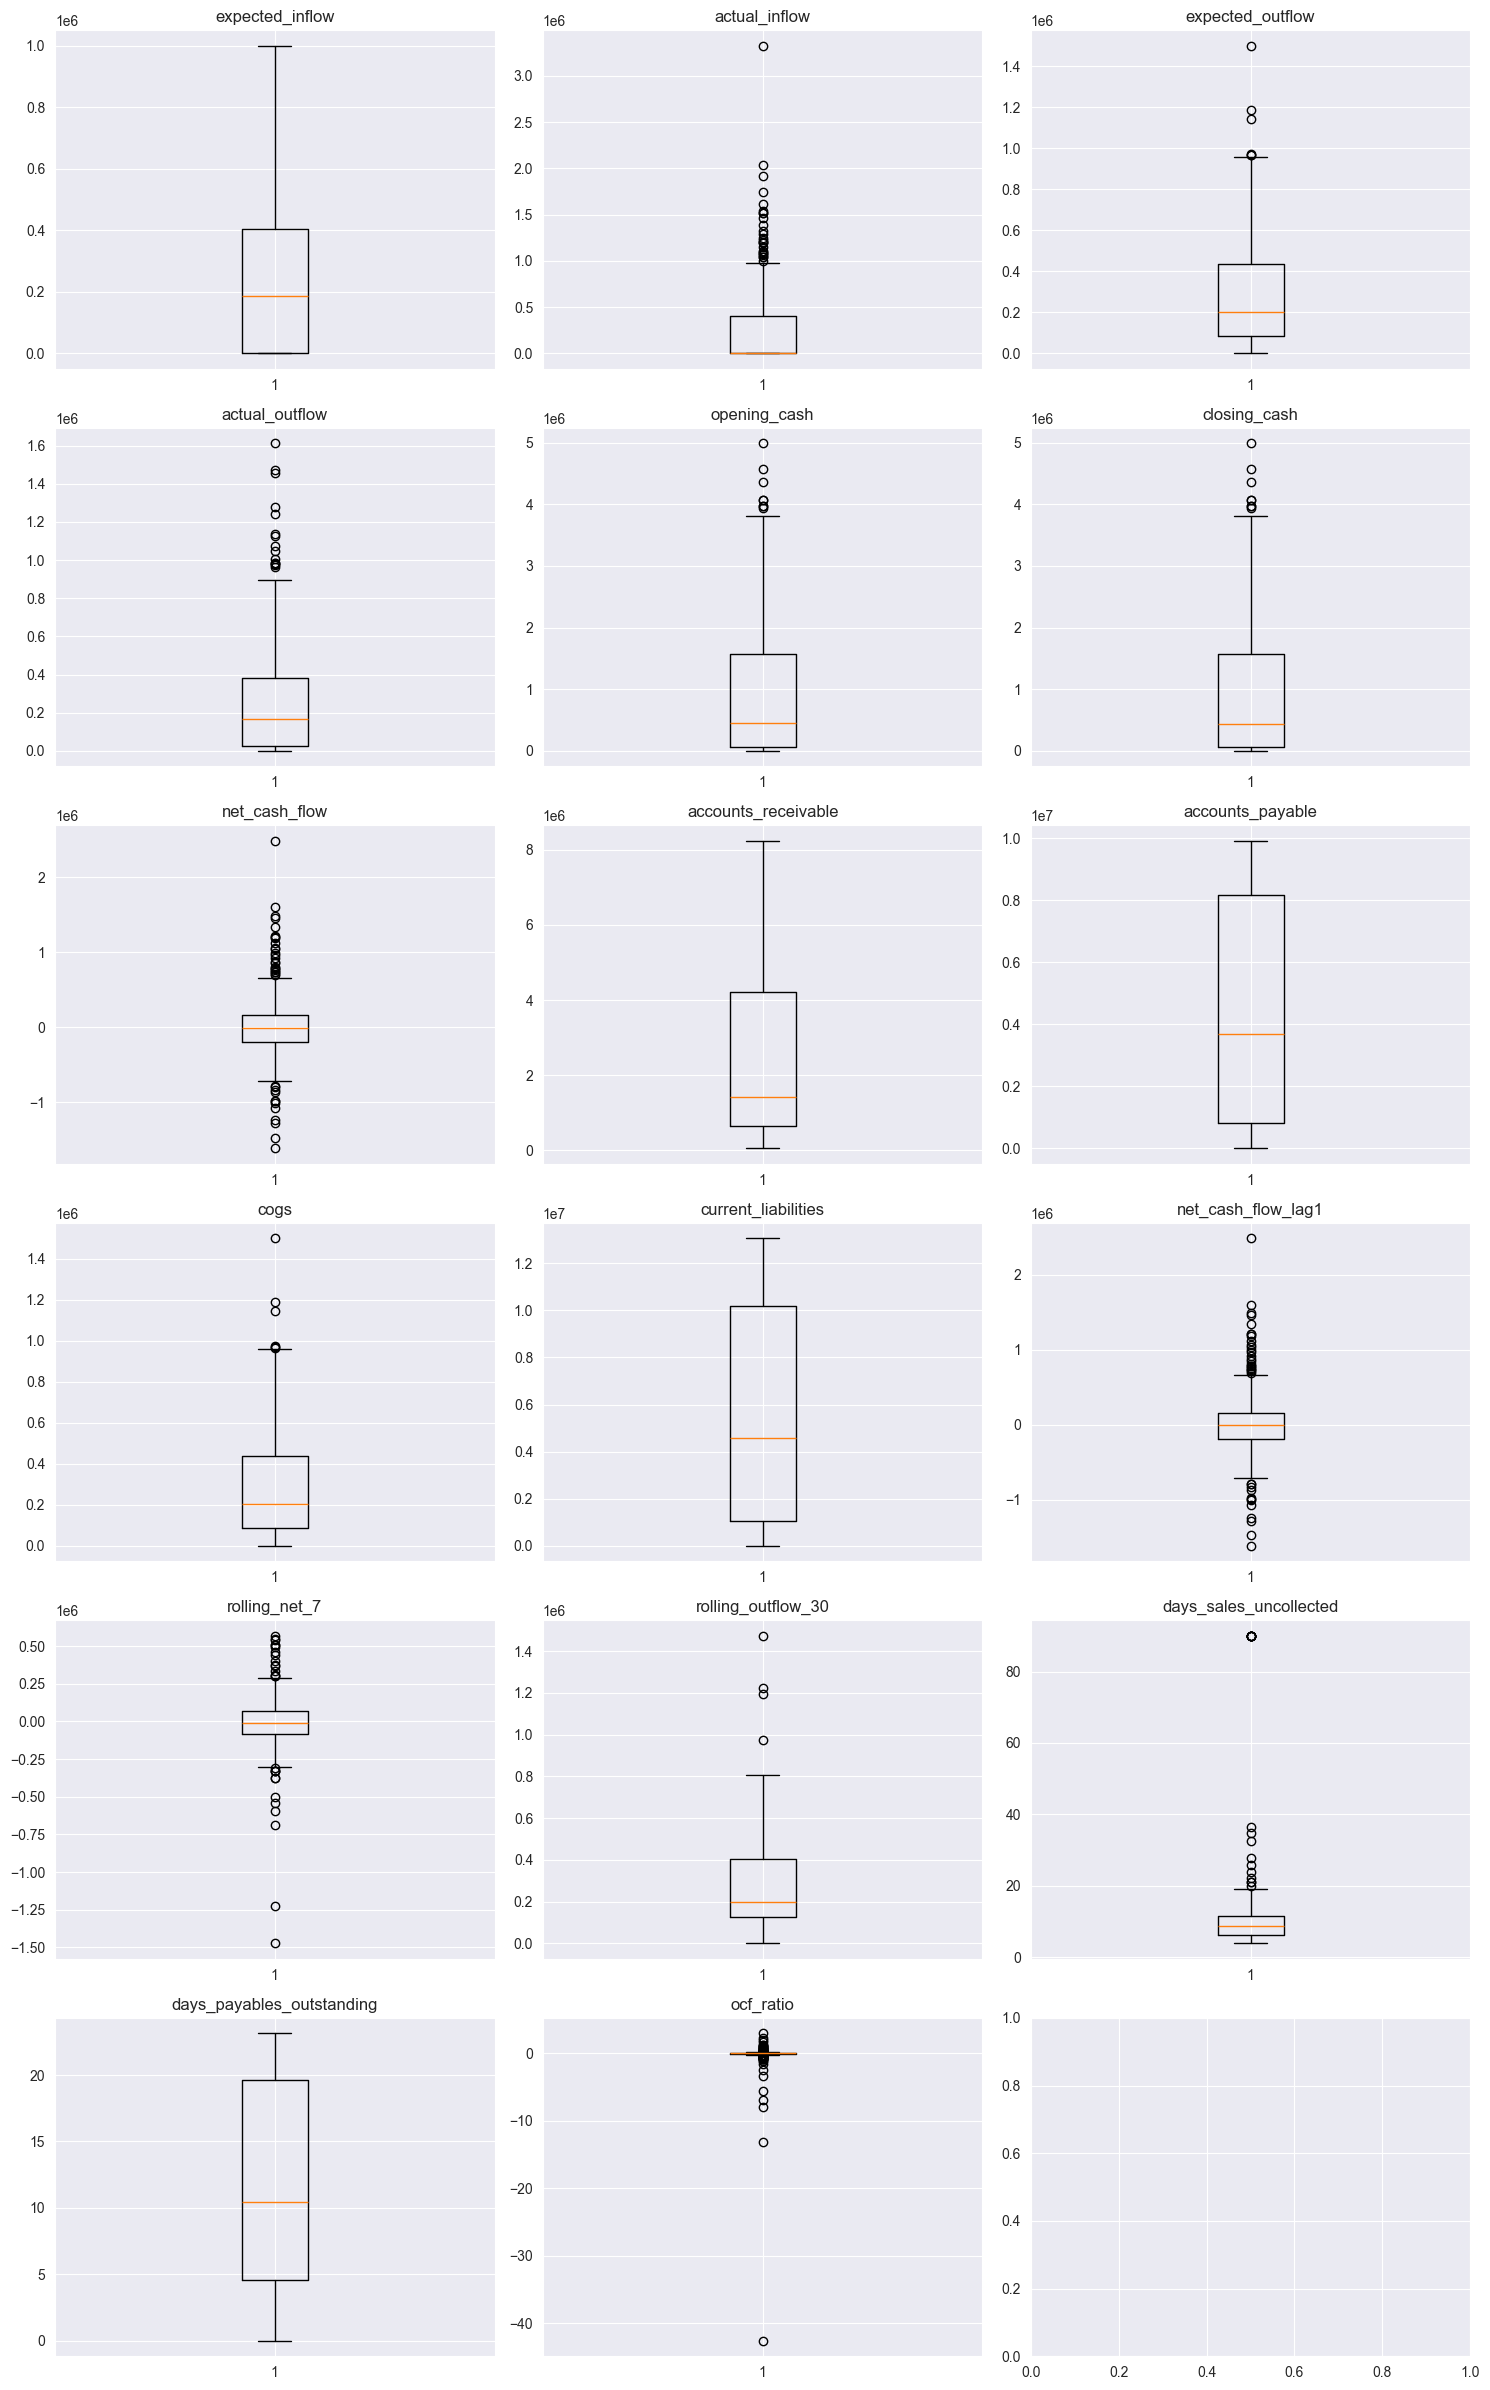

In [65]:
#visualizzo tutti i boxplot insieme
df_subset = df_copy.iloc[:, 2:19]
fig, axes = plt.subplots(6, 3, figsize=(15, 24))
axes = axes.flatten()

for i, col in enumerate(df_subset.columns):
    axes[i].boxplot(df_subset[col].dropna())
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [66]:
df_copy['year'] = df_copy['date'].dt.year
df_copy['quarter'] = df_copy['date'].dt.quarter

print("DataFrame with 'year' and 'quarter' columns:\n", df_copy.head())

DataFrame with 'year' and 'quarter' columns:
         date project_id  expected_inflow  actual_inflow  expected_outflow  \
0 2022-02-28      PJT_A        895265.88           0.00        1499375.75   
1 2022-05-08      PJT_A        780899.69           0.00        1142643.88   
2 2022-08-25      PJT_A             0.00     1520979.62        1187295.25   
3 2023-03-23      PJT_A        868384.19           0.00         483095.78   
4 2023-04-03      PJT_A        882046.25           0.00         830207.12   

   actual_outflow  opening_cash  closing_cash  net_cash_flow  \
0      1473503.12    2514901.50    1041398.31    -1473503.12   
1       974548.12    1041398.31      66850.20     -974548.12   
2      1135386.12      66850.20     452443.72      385593.53   
3       307591.28     452443.72     144852.44     -307591.28   
4       132316.78     144852.44      12535.66     -132316.78   

   accounts_receivable  ...       cogs  current_liabilities  \
0            895265.88  ... 1499375.75     

In [67]:
df_copy['cumulative_net_cash_flow'] = df_copy['net_cash_flow'].cumsum()

In [68]:
df_2022_quarterly_avg = df_copy[df_copy['year'] == 2022].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()
df_2023_quarterly_avg = df_copy[df_copy['year'] == 2023].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()
df_2024_quarterly_avg = df_copy[df_copy['year'] == 2024].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()
df_2025_quarterly_avg = df_copy[df_copy['year'] == 2025].groupby('quarter')['cumulative_net_cash_flow'].mean().reset_index()

print("2022 Quarterly Averages:\n", df_2022_quarterly_avg)
print("\n2023 Quarterly Averages:\n", df_2023_quarterly_avg)
print("\n2024 Quarterly Averages:\n", df_2024_quarterly_avg)
print("\n2025 Quarterly Averages:\n", df_2025_quarterly_avg)

2022 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1               -1473503.12
1        2               -2448051.25
2        3                -117017.01
3        4                -244508.36

2023 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1                -532815.06
1        2                -880825.62
2        3               -1055694.50
3        4                -443838.88

2024 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1                -394649.41
1        2                -521227.09
2        3               -1276498.38
3        4               -1233834.38

2025 Quarterly Averages:
    quarter  cumulative_net_cash_flow
0        1                -473775.75
1        2                 255795.72
2        3                -716202.81
3        4                 -69066.73


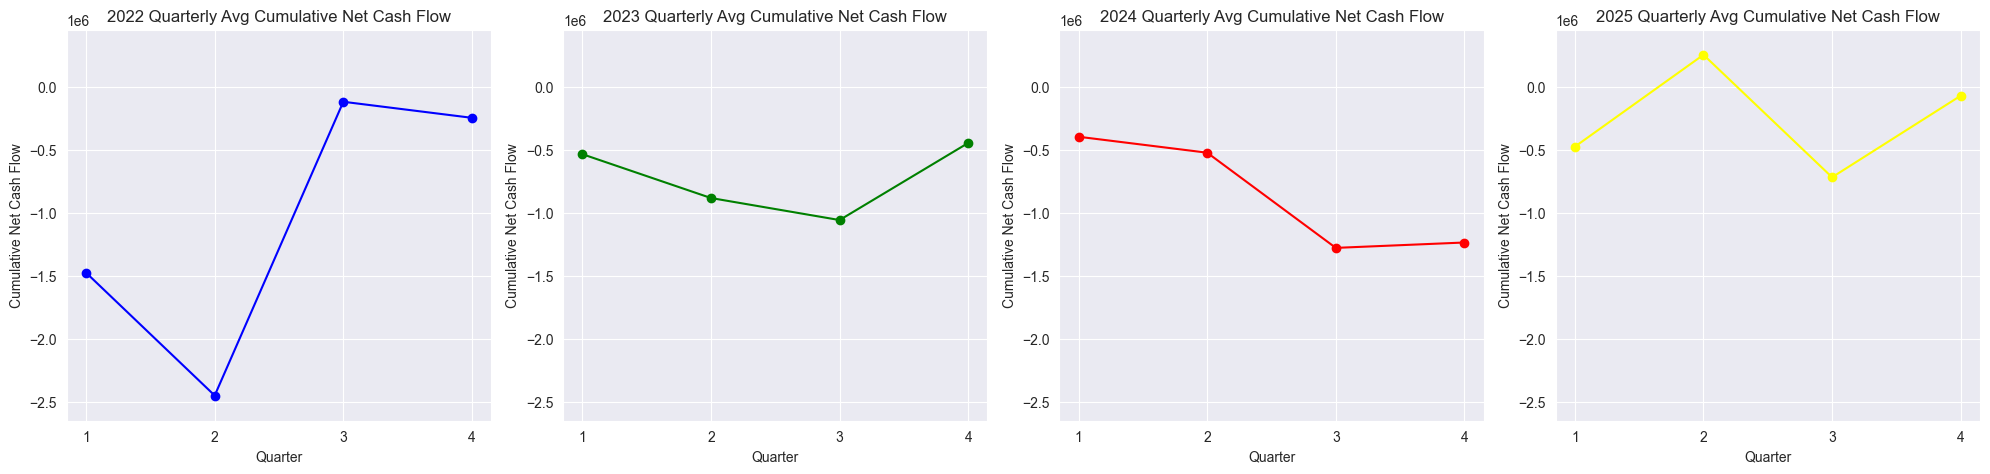

In [69]:
plt.figure(figsize=(20, 5))

# Determine common y-axis limits
min_y = min(df_2022_quarterly_avg['cumulative_net_cash_flow'].min(),
            df_2023_quarterly_avg['cumulative_net_cash_flow'].min(),
            df_2024_quarterly_avg['cumulative_net_cash_flow'].min(),
            df_2025_quarterly_avg['cumulative_net_cash_flow'].min()) - 200000 # Add some padding
max_y = max(df_2022_quarterly_avg['cumulative_net_cash_flow'].max(),
            df_2023_quarterly_avg['cumulative_net_cash_flow'].max(),
            df_2024_quarterly_avg['cumulative_net_cash_flow'].max(),
            df_2025_quarterly_avg['cumulative_net_cash_flow'].max()) + 200000 # Add some padding

# Plot for 2022
plt.subplot(1, 4, 1)
plt.plot(df_2022_quarterly_avg['quarter'], df_2022_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='blue')
plt.title('2022 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

# Plot for 2023
plt.subplot(1, 4, 2)
plt.plot(df_2023_quarterly_avg['quarter'], df_2023_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='green')
plt.title('2023 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

# Plot for 2024
plt.subplot(1, 4, 3)
plt.plot(df_2024_quarterly_avg['quarter'], df_2024_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='red')
plt.title('2024 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

# Plot for 2025
plt.subplot(1, 4, 4)
plt.plot(df_2025_quarterly_avg['quarter'], df_2025_quarterly_avg['cumulative_net_cash_flow'], marker='o', color='yellow')
plt.title('2025 Quarterly Avg Cumulative Net Cash Flow')
plt.xlabel('Quarter')
plt.ylabel('Cumulative Net Cash Flow')
plt.xticks([1, 2, 3, 4])
plt.ylim(min_y, max_y) # Apply common y-axis limits
plt.grid(True)

plt.tight_layout()
plt.show()